# Inferences Regarding Changes in the Mean

### Hypothesis tests on the mean of our sample(s)

---

In [180]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [181]:
# Filepath to our excel file.
skykomish_data_file = '../data/Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx'

# Use pandas.read_excel() function to open this file.
skykomish_data = pd.read_excel(skykomish_data_file)

# Now we can see the dataset we loaded:
skykomish_data.head(3)

/opt/conda/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,date of peak,water year,peak value (cfs),gage_ht (feet)
0,1928-10-09,1929,18800,10.55
1,1930-02-05,1930,15800,10.44
2,1931-01-28,1931,35100,14.08


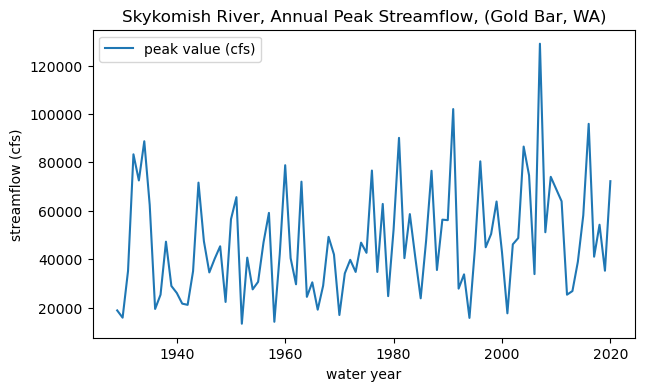

In [182]:
# Plot peak streamflows per water year
fig, ax = plt.subplots(figsize=(7,4))

skykomish_data.plot(x='water year', y='peak value (cfs)', ax=ax)
ax.set_ylabel('streamflow (cfs)');
ax.set_title('Skykomish River, Annual Peak Streamflow, (Gold Bar, WA)');

---
## Scenario:

In the past, a critical design value for mean annual peak streamflows of 45,000 cfs (measured at Gold Bar, WA) was used for engineering and planning projects on and along the Skykomish River.

We now want to know if the mean annual peak streamflow is different from (exceeding) the critical design value in our current climate conditions. We will use the latest 30 year period of data to test this, from 1990 to 2020.

We also want to know to what certainty can we say that it is or is not exceeding this value. 

To answer this question, we will use a "single sample" z-test.



In [183]:
# Select the latest 30 years of our data that we are interested in (1990-2020)
skykomish_data_30yr = skykomish_data[skykomish_data['water year'] >= 1990]

First we can formally state our null hypothesis, and our alternative hypothesis. To start off, let's set $\alpha$ at 5%.

Our **null hypothesis** is that the mean peak flow from 1990-2020 ($\bar{X}$) is drawn from the same distribution as the critical design value ($\mu$ = 45,000 cfs):

$H_0: \bar{X} = \mu$

$H_0: \bar{X} - \mu = 0$

Our **alternative hypothesis** is that the mean of the distribution for the 1990-2020 is greater than 45,000 cfs:

$H_1: \bar{X} > \mu$

$H_1: \bar{X} - \mu > 0$


First, let's lookup the value of the z-test score that we must exceed in order to reject the null hypothesis with an alpha of 5%.

In [221]:
# set alpha
alpha = 0.05

# lookup z-score for our alpha in the normal distribution
z_alpha = stats.norm.ppf( 1-alpha ) # lookup at 95%
print(f"z_alpha = {z_alpha}")

z_alpha = 1.6448536269514722


To reject the null hypothesis with 95% confidence, our z-test value must be greater than the above z_alpha value.

Set $\mu$ and compute $\bar{X}$:

In [222]:
# set our mu value
mu = 45000

# Calculate the mean of our sample (x_bar)
x_bar = skykomish_data_30yr['peak value (cfs)'].mean()
print(x_bar)

54490.0


Visualize the problem:

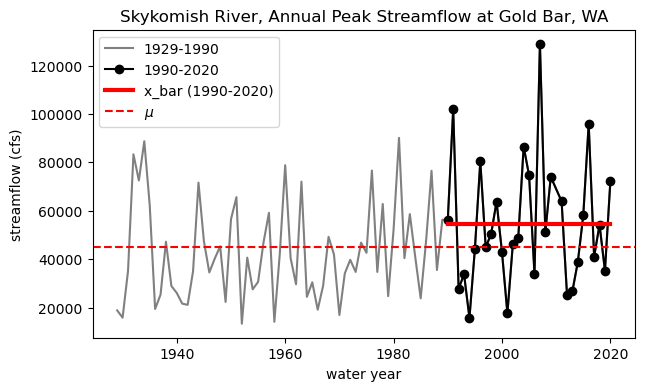

In [227]:
fig, ax = plt.subplots(figsize=(7,4))

# plot peak streamflows per water year
skykomish_data.plot(x='water year', y='peak value (cfs)', ax=ax, marker='none', color='grey', label='1929-1990')

skykomish_data_30yr.plot(x='water year', y='peak value (cfs)', ax=ax, marker='o', color='k', label='1990-2020')

# plot mean of our sample just to visualize it
ax.plot([1990,2020],[x_bar, x_bar],linestyle='-', color='r', lw=3, label='x_bar (1990-2020)')

# plot the mu value here just to visualize it
ax.axhline(mu,linestyle='--', color='r', label='$\mu$')

ax.legend()
ax.set_ylabel('streamflow (cfs)');
ax.set_title('Skykomish River, Annual Peak Streamflow at Gold Bar, WA');

Compute the z-test statistic to compare with z_alpha:

$\displaystyle Z_{test} = \frac{ (\bar{X} - \mu _{0} )} { \frac { s } {\sqrt{n}} }$

In [230]:
# compute standard deviation of our sample
s = skykomish_data_30yr['peak value (cfs)'].std()
print(f"s = {s}")

# number of samples
n = skykomish_data_30yr['peak value (cfs)'].count()
print(f"n = {n}")

# z-test statistic
z_test = ( x_bar - mu ) / ( s / np.sqrt(n) )
print(f"z_test = {z_test}")

### Remember: We can reject the null hypothesis if z_test > z_alpha

print(f"z_alpha = {z_alpha}")

s = 26149.32385227263
n = 30
z_test = 1.9877711179412694
z_alpha = 1.6448536269514722


We can reject the null hypothesis if z_test > z_alpha

In [231]:
# compute a p-value
p = 1 - stats.norm.cdf(z_test)
print(f"p = {np.round(p,2)}")

print(f"1-p = {np.round(1-p,2)}")

print(f"We can reject the null hypothesis with a confidence as high as {100*np.round(1-p,2)}%")

p = 0.02
1-p = 0.98
We can reject the null hypothesis with a confidence as high as 98.0%


**Conclusion:**

We can say that with 98% confidence, the mean annual peak streamflow in the current climate (represented by 1990-2020) is different from (exceeds) the critical design value of 45,000 cfs.

---
### Estimate Type II Error and Power

We want to know what the Type II error, $\beta$, or the probability of a false positive result (where we incorrectly accepted the null hypothesis), is for our test. We can also express this as the "power", $1-\beta$, of our test.

To do this, we have to posit some assumed "true" distribution from which $\bar{x}$ is from, and we'll give this distribution a mean of $\mu^*$ and standard deviation of $\sigma^*$.

In this example, we will use $\mu^*$ = 60,000 cfs, and set the standard deviation to just be the same as our 1990-2020 dataset $\sigma^* = s$.

We then need to find the z value in our "true" distribution that corresponds with z_alpha in the null distribution, which we'll call "z effective" or $z_{eff}$.

$ \mu^* + z_{eff} \frac{\sigma^*}{\sqrt{n}} = \mu + z_{\alpha}\frac{s}{\sqrt{n}}$

Solving for $z_{eff}$:

$ z_{eff} = \frac {\mu - \mu^* + z_{\alpha}\frac{s}{\sqrt{n}}}{ \frac{\sigma^*}{\sqrt{n}}}$

In [236]:
mu_star = 60000
sigma_star = s

# Rearranging the equation above to solve for the "z effective" value, the z value on our postulated "true" PDF
z_eff = ( mu - mu_star + z_alpha*(s/np.sqrt(n))) / ( sigma_star/np.sqrt(n) )
print("z_eff = {}".format(z_eff))

# Look up the cdf value of the postulated true distribution at this point to get our beta vlaue
beta = stats.norm.cdf(z_eff)

print("Type II error: {}".format(np.round(beta,4)))

# Thus, our confidence that we are not commiting Type II error is (given our assumptions about mu_star and sigma_star)
power = 1 - beta
print("Power: {}".format(np.round(power,4)))

z_eff = -1.4970396047786692
Type II error: 0.0672
Power: 0.9328
